In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

caminho = './desafio_indicium_imdb.csv'
df = pd.read_csv(caminho)

df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'])

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [14]:

# ---Sucesso financeiro e crítico---
print("---Analise entre o sucesso financeiro e crítico---")
correlation_matrix = df[['Gross','IMDB_Rating', 'Meta_score']].corr()
print(correlation_matrix)
print("\n")

---Analise entre o sucesso financeiro e crítico---
                Gross  IMDB_Rating  Meta_score
Gross        1.000000     0.099393   -0.030480
IMDB_Rating  0.099393     1.000000    0.271374
Meta_score  -0.030480     0.271374    1.000000




In [15]:
#---Analise de Impacto dos Diretores e Atores---
print("---Analise de Impacto dos Diretores---")
diretor_analysis = df.groupby('Director').agg(
    Media_gross = ('Gross', 'mean'),
    Media_imdb = ('IMDB_Rating', 'mean'),
    Quantidade_filmes = ('Director', 'count')
).sort_values(by= 'Media_gross', ascending = False)
print(diretor_analysis)
print("\n")

print("---Analise de Impacto dos Atores---")
actor_df = df.melt(id_vars=['Gross', 'IMDB_Rating'], value_vars=['Star1', 'Star2', 'Star3', 'Star4'], var_name='Star_Position', value_name='Actor')

actor_analysis = actor_df.groupby('Actor').agg(
    Media_gross=('Gross', 'mean'),
    Media_imdb_ator=('IMDB_Rating', 'mean')
).sort_values(by='Media_gross', ascending=False)

actor_analysis['Media_gross'] = actor_analysis['Media_gross'].map('${:,.2f}'.format)

print(actor_analysis)
print("\n")


---Analise de Impacto dos Diretores---
                   Media_gross  Media_imdb  Quantidade_filmes
Director                                                     
Anthony Russo     5.512599e+08    8.075000                  4
Gareth Edwards    5.321773e+08    7.800000                  1
J.J. Abrams       4.743903e+08    7.833333                  3
Josh Cooley       4.340380e+08    7.800000                  1
Roger Allers      4.227838e+08    8.500000                  1
...                        ...         ...                ...
Yavuz Turgul               NaN    8.200000                  1
Yilmaz Erdogan             NaN    8.000000                  1
Yoshifumi Kondô            NaN    7.900000                  1
Çagan Irmak                NaN    8.300000                  1
Ömer Faruk Sorak           NaN    8.000000                  1

[548 rows x 3 columns]


---Analise de Impacto dos Atores---
                        Media_gross  Media_imdb_ator
Actor                                   

In [16]:
print("---Analise de sucesso entre o publico---")
diretor_analysis = df.groupby('Series_Title').agg(
    numVotos = ('No_of_Votes', 'first'),
    Media_imdb = ('IMDB_Rating', 'mean'),
).sort_values(by= 'numVotos', ascending = False)
print(diretor_analysis)
print("\n")

---Analise de sucesso entre o publico---
                                   numVotos  Media_imdb
Series_Title                                           
The Dark Knight                     2303232         9.0
Inception                           2067042         8.8
Fight Club                          1854740         8.8
Pulp Fiction                        1826188         8.9
Forrest Gump                        1809221         8.8
...                                     ...         ...
Raazi                                 25344         7.8
Scarface: The Shame of the Nation     25312         7.8
La planète sauvage                    25229         7.8
God's Own Country                     25198         7.7
Ba wang bie ji                        25088         8.1

[998 rows x 2 columns]




In [17]:
#---Analise de engajamento do público---
print("---Analise de engajamento do público---")
engajamento_analysis = df[['No_of_Votes', 'Gross', 'IMDB_Rating']].corr()
print(engajamento_analysis)
print("\n")

---Analise de engajamento do público---
             No_of_Votes     Gross  IMDB_Rating
No_of_Votes     1.000000  0.589527     0.479308
Gross           0.589527  1.000000     0.099393
IMDB_Rating     0.479308  0.099393     1.000000




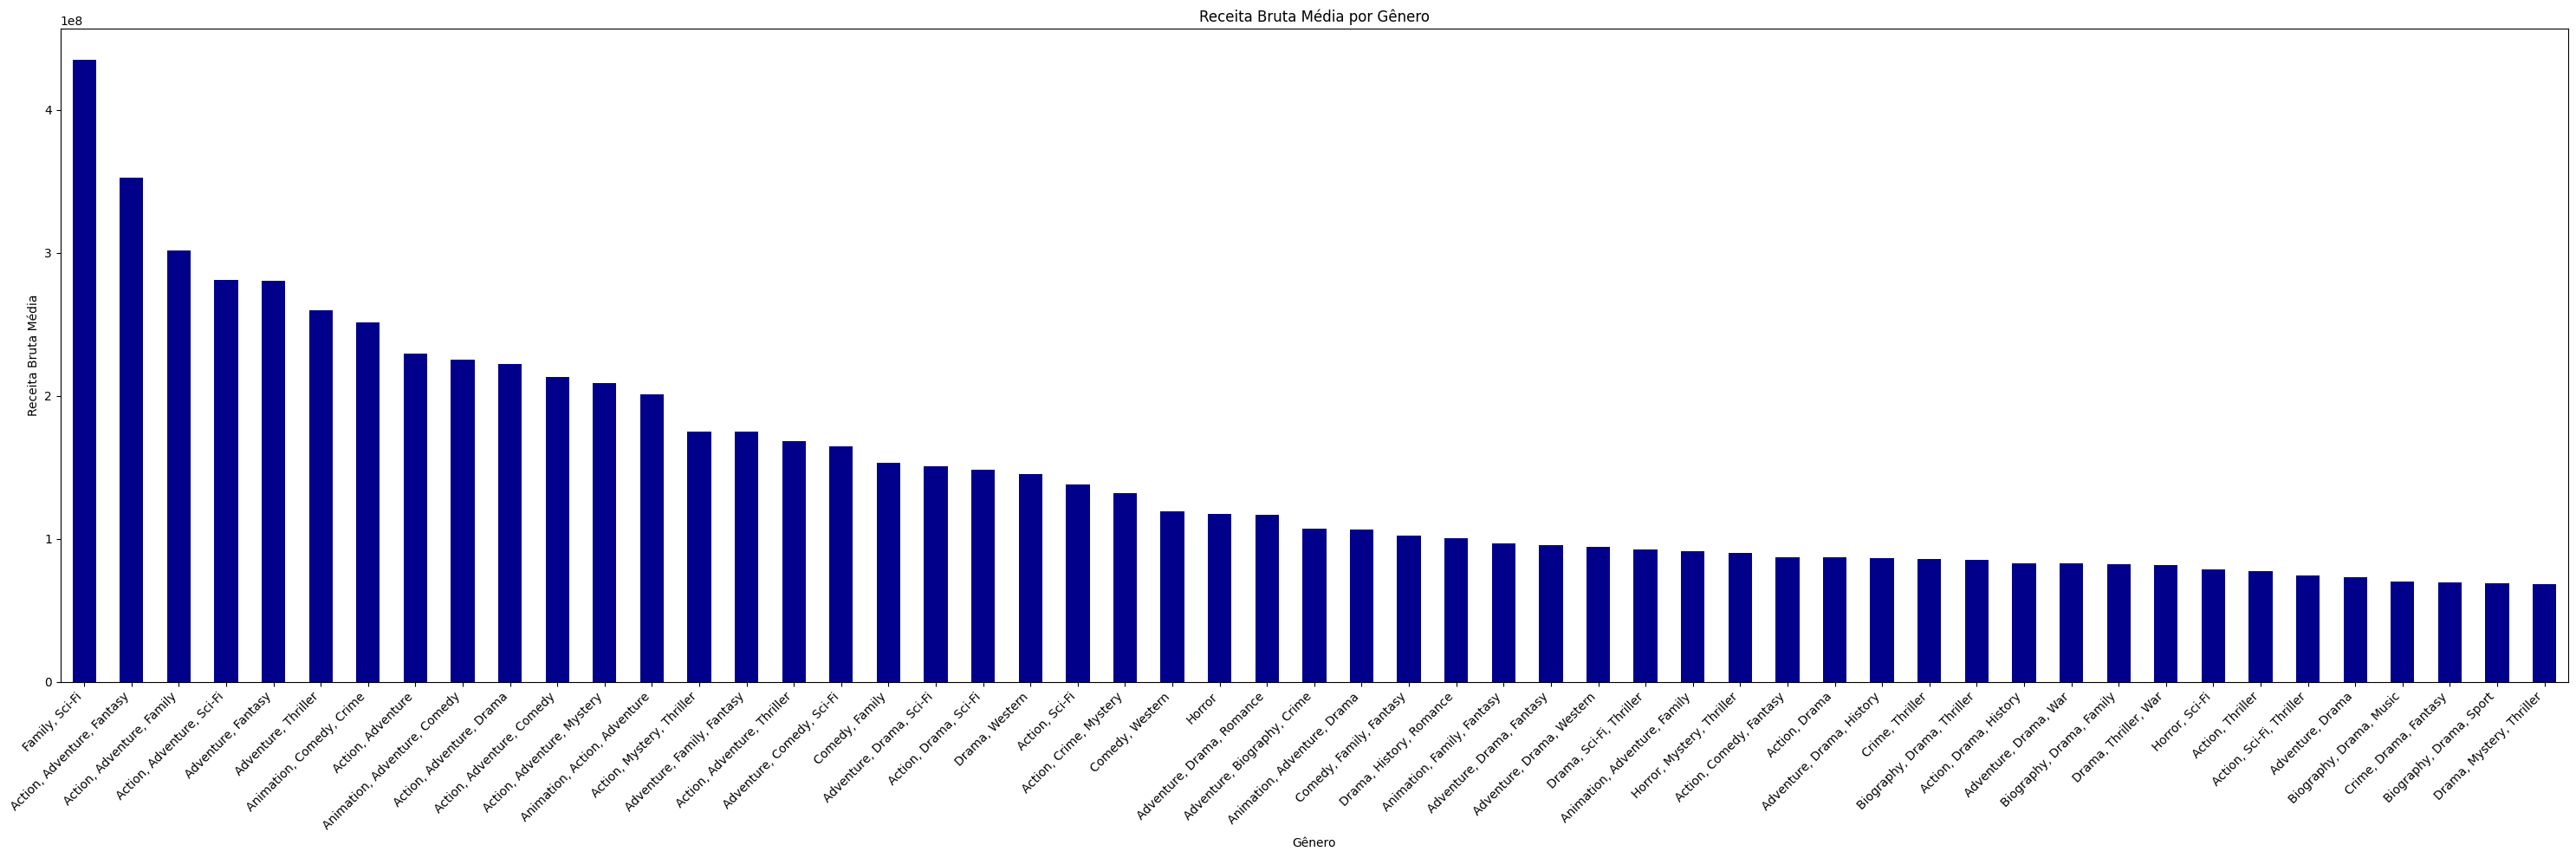

Média geral de receita bruta: $68,082,574.10


In [18]:
#---Gráfico Receita bruta por genero---
media_gross = df['Gross'].mean()
genero_gross_analysis = df.groupby('Genre')['Gross'].mean()
generos_acima = genero_gross_analysis[genero_gross_analysis > media_gross]

plt.figure(figsize=(30,10))
generos_acima.sort_values(ascending=False).plot(kind='bar', color='darkblue')
plt.title('Receita Bruta Média por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Receita Bruta Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('receita_bruta_por_genero.png')
plt.show()

#media geral ref
print(f"Média geral de receita bruta: ${media_gross:,.2f}")

In [21]:
api_key = "SUA_API"

# --- Passo 1: calcular a média do Gross ---
media_gross = df["Gross"].mean()

# --- Passo 2: filtrar filmes acima da média ---
acima_media = df[df["Gross"] > media_gross]

# --- Passo 3: lista para salvar resultados ---
dados_filmes = []

# --- Passo 4: buscar dados na API ---
for _, row in acima_media.iterrows():
    titulo = row["Series_Title"]
    ano = row["Released_Year"]

    url_busca = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={titulo}&year={ano}"
    resposta_busca = requests.get(url_busca)
    dados_busca = resposta_busca.json()

    if dados_busca['results']:
        filme_id = dados_busca['results'][0]['id']

        url_detalhes = f"https://api.themoviedb.org/3/movie/{filme_id}?api_key={api_key}"
        resposta_detalhes = requests.get(url_detalhes)
        dados_detalhes = resposta_detalhes.json()

        budget = dados_detalhes.get("budget", 0)
        revenue = dados_detalhes.get("revenue", 0)
        lucro = revenue - budget

        dados_filmes.append({
            "titulo": dados_detalhes["title"],
            "budget": budget,
            "revenue": revenue,
            "lucro": lucro,
            "gross_planilha": row["Gross"]
        })

# --- Passo 5: transformar em DataFrame ---
resultado = pd.DataFrame(dados_filmes)

# --- Passo 6: ordenar pelos mais lucrativos ---
resultado_ordenado = resultado.sort_values(by="lucro", ascending=False)

print("Filmes mais lucrativos (acima da média da planilha):")
print(resultado_ordenado)

Filmes mais lucrativos (acima da média da planilha):
                           titulo     budget     revenue       lucro  gross_planilha
147                        Avatar  237000000  2923706026  2686706026     760507625.0
25              Avengers: Endgame  356000000  2799439100  2443439100     858373000.0
155                       Titanic  200000000  2264162353  2064162353     659325379.0
116  Star Wars: The Force Awakens  245000000  2068223624  1823223624     936662225.0
26         Avengers: Infinity War  300000000  2052415039  1752415039     678815482.0
..                            ...        ...         ...         ...             ...
99                  Groundhog Day   14600000    71108778    56508778      70906973.0
163                  My Fair Lady   17000000    72661442    55661442      72000000.0
223                      Watchmen  130000000   185258983    55258983     107509799.0
127              The Untouchables   25000000    76270454    51270454      76270454.0
196      The

In [23]:
dados_completos = pd.merge(
    resultado, 
    acima_media[["Series_Title", "Genre"]], 
    left_on="titulo", 
    right_on="Series_Title", 
    how="left"
)

dados_completos["lucro"] = dados_completos["revenue"] - dados_completos["budget"]

# --- Passo 5: separar os gêneros (na planilha pode ter múltiplos separados por vírgula) ---
dados_completos["Genre"] = dados_completos["Genre"].str.split(",")

# --- Passo 6: explodir gêneros em várias linhas ---
dados_explodidos = dados_completos.explode("Genre")
dados_explodidos["Genre"] = dados_explodidos["Genre"].str.strip()  # remove espaços

# --- Passo 7: agrupar por gênero e somar lucros ---
lucro_por_genero = dados_explodidos.groupby("Genre")["lucro"].sum().reset_index()

# --- Passo 8: ordenar do mais lucrativo para o menos ---
lucro_por_genero = lucro_por_genero.sort_values(by="lucro", ascending=False)

# Itere sobre o DataFrame e imprima cada linha
for index, row in lucro_por_genero.iterrows():
    # Use f-string para formatar a saída
    print(f'{row["Genre"]}: ${row["lucro"]:,}')

Adventure: $51,508,436,275
Drama: $38,768,961,160
Action: $36,974,163,872
Comedy: $18,224,014,560
Animation: $15,972,521,510
Sci-Fi: $13,468,342,185
Fantasy: $10,877,249,992
Thriller: $10,001,429,749
Crime: $7,402,567,932
Family: $7,306,349,442
Romance: $6,284,163,493
Biography: $5,890,303,202
Mystery: $4,024,897,034
History: $2,885,949,804
Music: $1,981,885,923
War: $1,390,815,493
Western: $1,203,534,533
Sport: $1,098,945,609
Horror: $967,148,821
Musical: $129,965,772


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Passo 1: Preparar os dados
# Vamos usar o 'Meta_score', 'No_of_Votes' e 'Gross' como variáveis preditoras (X)
# e o 'IMDB_Rating' como a variável alvo (y)
X = df[['Meta_score', 'No_of_Votes', 'Gross']]
y = df['IMDB_Rating']

# As colunas com dados ausentes precisam ser tratadas.
# Vamos preencher os valores ausentes de 'Meta_score' com a média da coluna.
X = X.fillna(X.mean())
# Para Gross, o seu código já converteu os valores ausentes, mas é bom garantir.
# X['Gross'] = pd.to_numeric(X['Gross'].astype(str).str.replace(',', ''), errors='coerce')
# X['Gross'] = X['Gross'].fillna(X['Gross'].mean())

# Passo 2: Dividir os dados em conjuntos de treino e teste
# Usamos 80% dos dados para treinar e 20% para testar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3: Criar e treinar o modelo
# Usaremos o Random Forest Regressor, que é robusto e não exige linearidade
modelo_regressao = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_regressao.fit(X_train, y_train)

# Passo 4: Fazer previsões e avaliar o modelo
previsoes = modelo_regressao.predict(X_test)
mae = mean_absolute_error(y_test, previsoes)
# Faz a previsão para o conjunto de teste




print(f"O Erro Absoluto Médio (MAE) do modelo é: {mae:.2f}")

O Erro Absoluto Médio (MAE) do modelo é: 0.17


In [25]:
# Dados do filme The Shawshank Redemption que você forneceu
dados_shawshank = {'Meta_score': 80.0,
                   'No_of_Votes': 2343110,
                   'Gross': 28341469}

# Crie um DataFrame com os dados do filme
# Os nomes das colunas devem ser exatamente os mesmos que você usou para treinar o modelo
filme_para_prever = pd.DataFrame([dados_shawshank])

# Use o modelo treinado para fazer a previsão
nota_prevista = modelo_regressao.predict(filme_para_prever)

print(f"A nota do IMDB prevista para 'The Shawshank Redemption' é: {nota_prevista[0]:.2f}")

A nota do IMDB prevista para 'The Shawshank Redemption' é: 8.80


In [12]:
import pickle

# Salva o modelo treinado em um arquivo chamado 'modelo_regressao.pkl'
with open('modelo_regressao.pkl', 'wb') as arquivo:
    pickle.dump(modelo_regressao, arquivo)

print("Modelo salvo com sucesso no arquivo 'modelo_regressao.pkl'.")

Modelo salvo com sucesso no arquivo 'modelo_regressao.pkl'.
